In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![](pic2.png)

Пусть $ y_{1} = x, \: y_{2} = y, \: y_{3} = x^{'}_{t}, \: y_{4} = y^{'}_{t}  $

Тогда получим систему ОДУ 1 порядка:
$$   \frac{dy_{1}}{dt} = y_{3}, \:  \frac{dy_{2}}{dt} = y_{4}, \: 
\frac{dy_{3}}{dt} =  -\gamma \frac{M}{(y_{1}^{2}+y_{2}^{2})^{3/2}} y_{1}, \:
\frac{dy_{4}}{dt} =  -\gamma \frac{M}{(y_{1}^{2}+y_{2}^{2})^{3/2}} y_{2},$$

$$  y_{1}(0) = r_{c}, \: y_{2}(0) = 0, \: y_{3}(0) = 0, \: y_{4}(0) = v_{c} - u  $$

Пусть $ \frac{dy_{i}}{dt} = f_{i}(t, y_{1}, y_{2}, y_{3}, y_{4})$


In [2]:
# константы
M = 5.99e24
r_c = 1e7
g = 6.67e-11
R_zemli = 6380e3

v_c = np.sqrt((g * M) / R_zemli)
u = 0

In [3]:
def f(t, y: list):
    y1, y2, y3, y4 = y
    
    r3 = (y1**2 + y2**2)**(3/2)
    
    f1 = y3
    f2 = y4
    f3 = (-g) * (M / r3) * y1
    f4 = (-g) * (M / r3) * y2
    f = np.array([f1, f2, f3, f4])
    return f

In [4]:
t_n = 80000.0  # граница времени
h = 5  # шаг сетки
N = int(t_n / h) + 2

t = np.linspace(0, t_n, N+1)
y = np.zeros((N+1, 4))

# начальные условия
y[0][0] = r_c
y[0][1] = 0
y[0][2] = 0
y[0][3] = v_c - u


for i in range(N):
    k1 = f(t[i], y[i])
    k2 = f(t[i]+h/2, y[i]+(h/2)*k1)
    k3 = f(t[i]+h/2, y[i]+(h/2)*k2)
    k4 = f(t[i]+h, y[i]+h*k3)
    
    y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

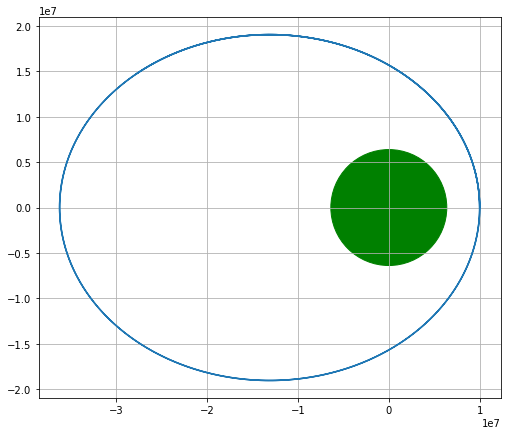

In [5]:
plt.figure(figsize=(15, 7))
circle1 = plt.Circle((0, 0), R_zemli, color='green', fill=True)

plt.plot(y[:, 0], y[:, 1])

ax=plt.gca()
ax.add_patch(circle1)
plt.axis('scaled')
plt.grid()
plt.show()

Нашли траеткорию спутника при u = 0

Теперь посмотрим, при какой u он упадет на землю

In [6]:
def rk(u):
    # ctrl c, ctrl v
    t_n = 80000.0
    h = 5  
    N = int(t_n / h) + 2
    t = np.linspace(0, t_n, N)
    y = np.zeros((N+1, 4))
    y[0][0] = r_c
    y[0][1] = 0
    y[0][2] = 0
    y[0][3] = v_c - u
    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i]+h/2, y[i]+(h/2)*k1)
        k3 = f(t[i]+h/2, y[i]+(h/2)*k2)
        k4 = f(t[i]+h, y[i]+h*k3)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    plt.figure(figsize=(15, 7))
    circle1 = plt.Circle((0, 0), R_zemli, color='green', fill=True)

    plt.plot(y[:, 0], y[:, 1], color='red')
    plt.title(f'u = {u} м/c')
    
    ax=plt.gca()
    ax.add_patch(circle1)
    plt.axis('scaled')
    plt.grid()
    plt.show()

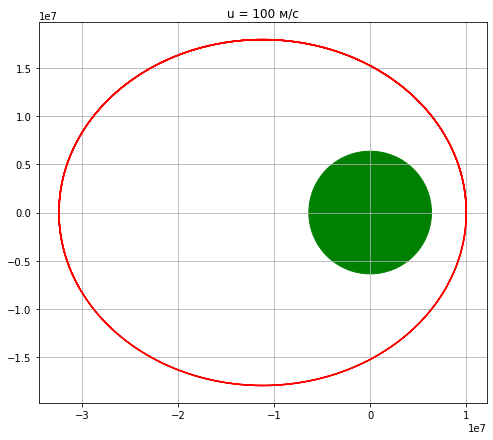

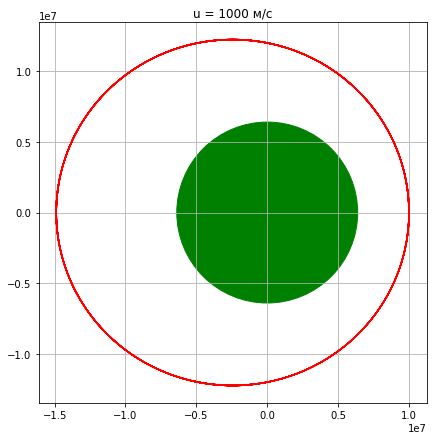

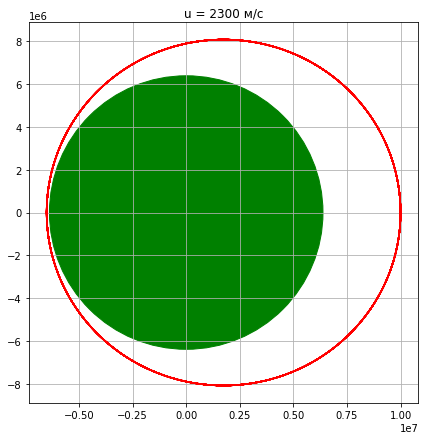

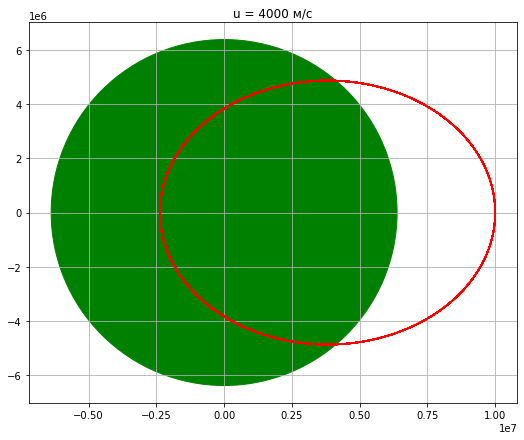

In [7]:
u_list = [100, 1000, 2300, 4000]

for u in u_list:
    rk(u)

**То есть примерно при u = 2300 m/s**

Проверим 3-й закон Кеплера для случая u = 0

$$ T = \frac{2\pi a^{3/2}}{\sqrt{\gamma M}} $$

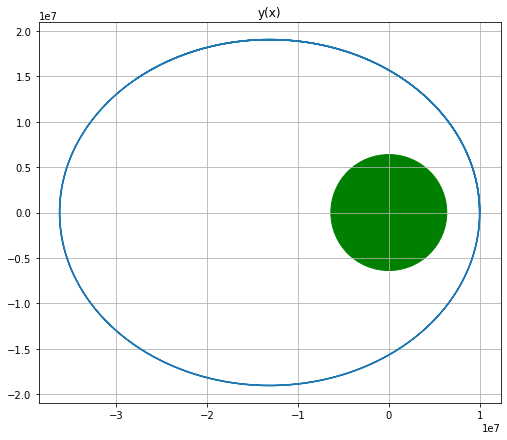

In [8]:
plt.figure(figsize=(15, 7))
circle1 = plt.Circle((0, 0), R_zemli, color='green', fill=True)
plt.plot(y[:, 0], y[:, 1])
ax=plt.gca()
ax.add_patch(circle1)
plt.axis('scaled')
plt.title('y(x)')
plt.grid()
plt.show()

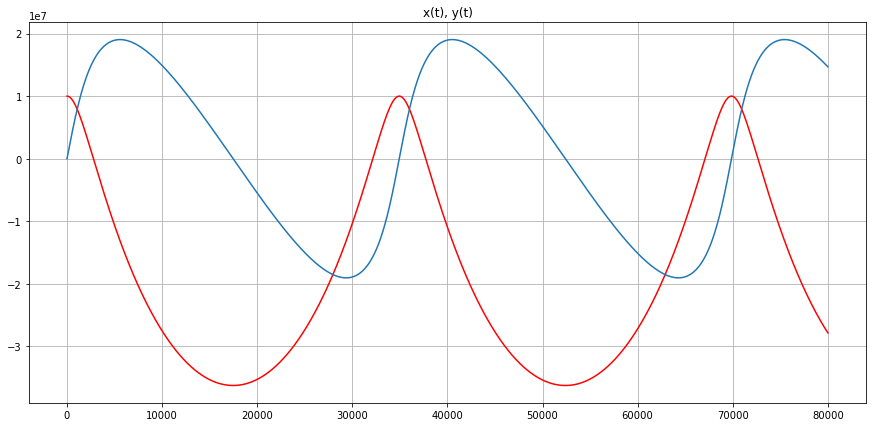

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(t, y[:, 0], color='red')
plt.plot(t, y[:, 1])
plt.title('x(t), y(t)')
plt.grid()

In [10]:
# ищем максимумы для определения периода
x = y[:, 0]
m = max(x)
max_t = []
eps = 6
for i in range(len(x)):
    if abs(x[i] - m) < eps:
        max_t.append(t[i])
        print(t[i], 'max')

0.0 max
34930.633670791154 max
69861.26734158231 max


In [11]:
a = (max(y[:, 0]) - min(y[:, 0])) / 2
a  # большая полоуось

23115941.906062264

In [12]:
T = max_t[1] - max_t[0]
T  # период (из численного решения)

34930.633670791154

In [13]:
T1 = 2 * np.pi * a**(3/2) / np.sqrt(g*M)
T1  # период теоретический

34935.81922964237